In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder



In [5]:
# Load your dataset
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')

In [7]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,ratings,reviews.sourceURLs,reviewsText,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [9]:
df.tail()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,ratings,reviews.sourceURLs,reviewsText,reviews.title,reviews.username,sourceURLs
4995,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-30T02:06:48.451Z,2017-06-07T08:20:48.408Z",True,NaN,0,5,http://reviews.bestbuy.com/3545/5025900/review...,This is a great tablet for the price. Amazon i...,Good product,litle,"https://www.barcodable.com/upc/841667103150,ht..."
4996,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-30T02:07:00.236Z,2017-06-07T08:20:55.199Z",True,NaN,1,5,http://reviews.bestbuy.com/3545/5025900/review...,This tablet is the perfect size and so easy to...,Great Tablet,gracie,"https://www.barcodable.com/upc/841667103150,ht..."
4997,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-30T02:03:13.567Z,2017-06-07T08:10:47.953Z",True,NaN,8,4,http://reviews.bestbuy.com/3545/5025900/review...,Purchased this for my son. Has room to upgrade...,Great for kids or smaller needs,Hawk,"https://www.barcodable.com/upc/841667103150,ht..."
4998,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-30T02:06:56.574Z,2017-06-07T08:20:53.942Z",True,NaN,0,5,http://reviews.bestbuy.com/3545/5025900/review...,I had some thoughts about getting this for a 5...,Very sturdy for a 5 year old,Mrbilly,"https://www.barcodable.com/upc/841667103150,ht..."
4999,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-03T03:55:09.054Z,2017-04-30T02:03:18.1...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5025900/review...,"this is a steal, have 8 gb model as well.This ...",great little tablet,tabman,"https://www.barcodable.com/upc/841667103150,ht..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

In [13]:
# Check for Duplication

In [15]:
df.nunique()

id                       24
dateAdded                20
dateUpdated              17
name                     23
asins                    24
brand                     1
categories               23
primaryCategories         4
imageURLs                24
keys                     24
manufacturer              1
manufacturerNumber       24
reviews.date            679
reviews.dateAdded       381
reviews.dateSeen        417
reviews.doRecommend       2
reviews.id               26
reviews.numHelpful       29
ratings                   5
reviews.sourceURLs     2827
reviewsText            4385
reviews.title          3124
reviews.username       3814
sourceURLs               24
dtype: int64

In [17]:
# Missing Values Calculation

In [19]:
df.isnull().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateAdded      3948
reviews.dateSeen          0
reviews.doRecommend       0
reviews.id             4971
reviews.numHelpful        0
ratings                   0
reviews.sourceURLs        0
reviewsText               0
reviews.title            13
reviews.username          1
sourceURLs                0
dtype: int64

In [21]:
(df.isnull().sum()/(len(df)))*100

id                      0.00
dateAdded               0.00
dateUpdated             0.00
name                    0.00
asins                   0.00
brand                   0.00
categories              0.00
primaryCategories       0.00
imageURLs               0.00
keys                    0.00
manufacturer            0.00
manufacturerNumber      0.00
reviews.date            0.00
reviews.dateAdded      78.96
reviews.dateSeen        0.00
reviews.doRecommend     0.00
reviews.id             99.42
reviews.numHelpful      0.00
ratings                 0.00
reviews.sourceURLs      0.00
reviewsText             0.00
reviews.title           0.26
reviews.username        0.02
sourceURLs              0.00
dtype: float64

In [23]:
# Statistics Summary

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
reviews.id,29.0,1.858740e+08,2.084040e+07,108211188.0,185118492.0,188075721.0,198194852.0,202781248.0
reviews.numHelpful,5000.0,3.124000e-01,3.111582e+00,0.0,0.0,0.0,0.0,105.0
ratings,5000.0,4.596800e+00,7.318038e-01,1.0,4.0,5.0,5.0,5.0


In [27]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5000,24,AVqkIhwDv8e3D1O-lebb,797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dateAdded,5000,20,2017-03-06T14:59:43Z,797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dateUpdated,5000,17,2018-09-21T18:45:21Z,1429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,5000,23,Amazon Echo Show Alexa-enabled Bluetooth Speak...,845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asins,5000,24,B01AHB9CN2,797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,5000,1,Amazon,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categories,5000,23,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primaryCategories,5000,4,Electronics,3276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
imageURLs,5000,24,https://i5.walmartimages.com/asr/c494506a-b347...,797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keys,5000,24,"841667104676,amazon/53004484,amazon/b01ahb9cn2...",797,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# separate Numerical and categorical variables for easy analysis

In [37]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include= np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.sourceURLs', 'reviewsText',
       'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')
Numerical Variables:
['reviews.id', 'reviews.numHelpful', 'ratings']


In [39]:
 # EDA Univariate Analysis

reviews.id
Skew : -2.53


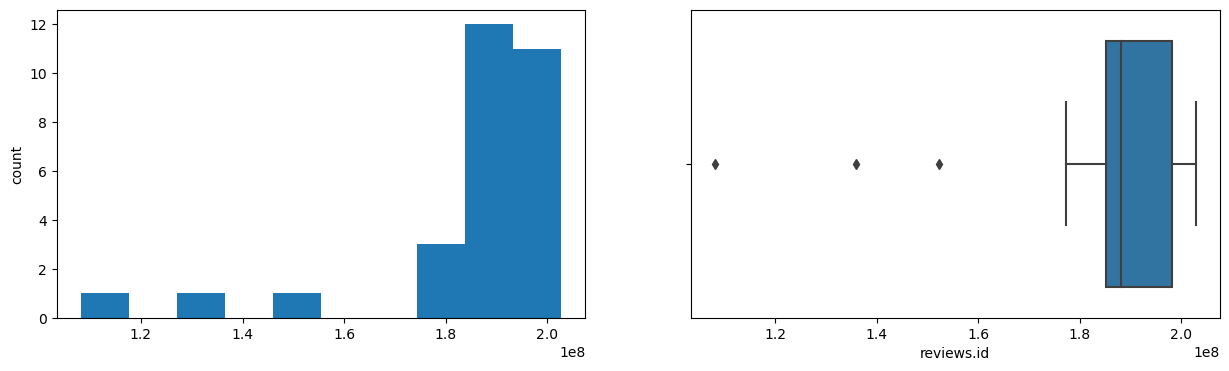

reviews.numHelpful
Skew : 24.73


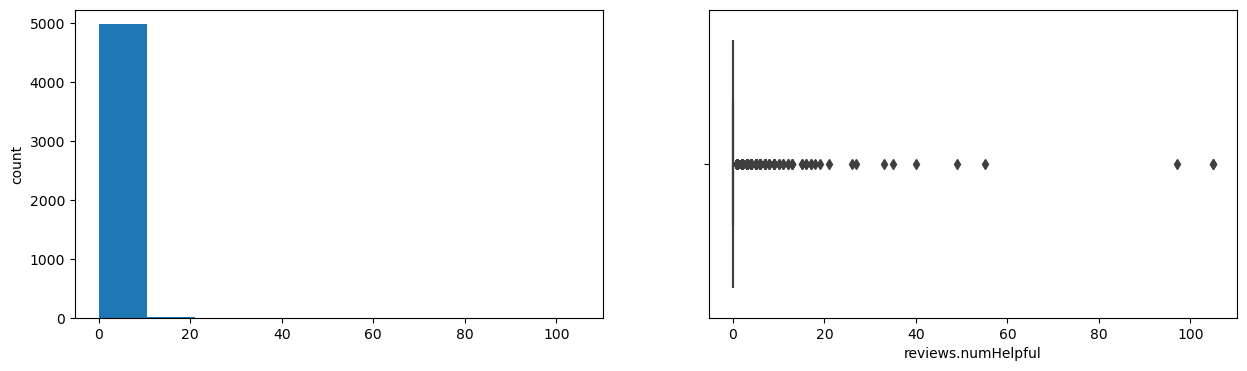

ratings
Skew : -2.4


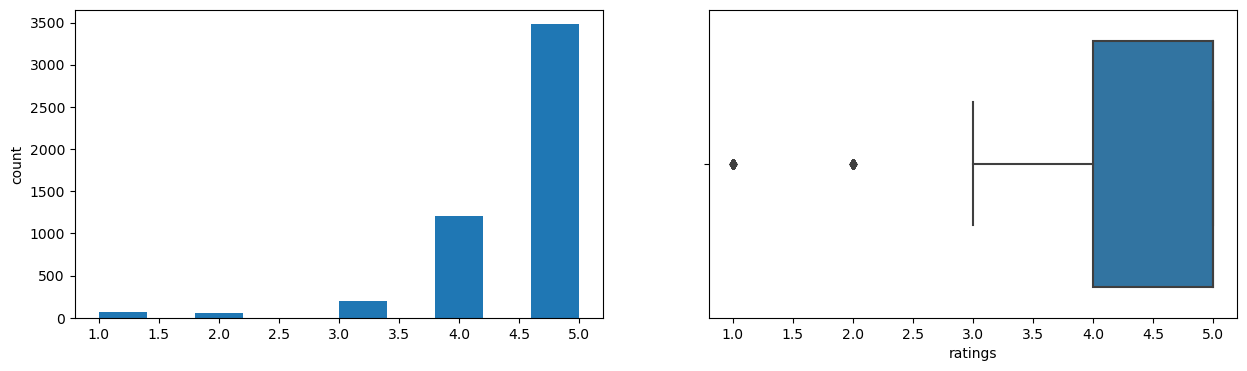

In [41]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

C:\Users\Khushbu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


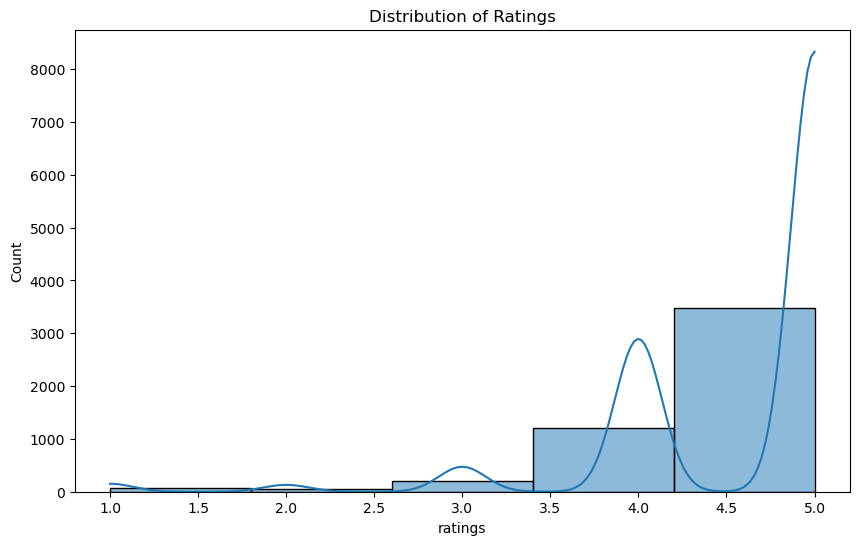

In [43]:
# Histogram of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['ratings'], bins=5, kde=True)
plt.title('Distribution of Ratings') 
plt.show()


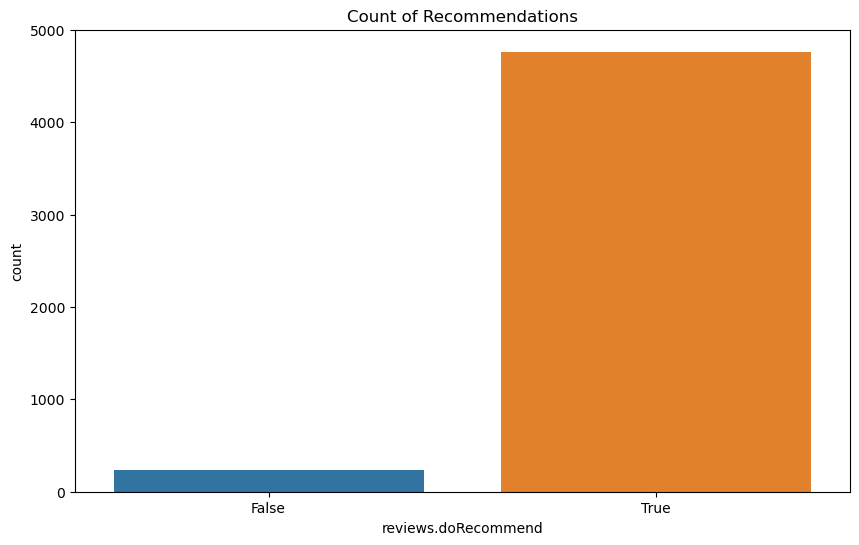

In [45]:
# Count plot of recommendations
plt.figure(figsize=(10, 6))
sns.countplot(x='reviews.doRecommend', data=df)
plt.title('Count of Recommendations')
plt.show()

In [47]:
# Extract year from the date
df['year'] = pd.to_datetime(df['dateAdded']).dt.year


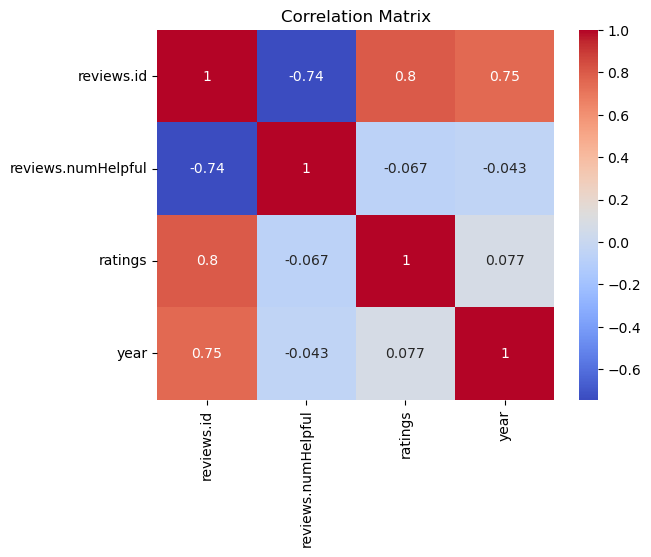

In [55]:
# Correlation matrix
#correlation_matrix = df.corr()
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [57]:
# Number of Reviews Over Time:

C:\Users\Khushbu\AppData\Local\Temp\ipykernel_22484\1916673924.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['reviews.date'].dt.to_period('M')


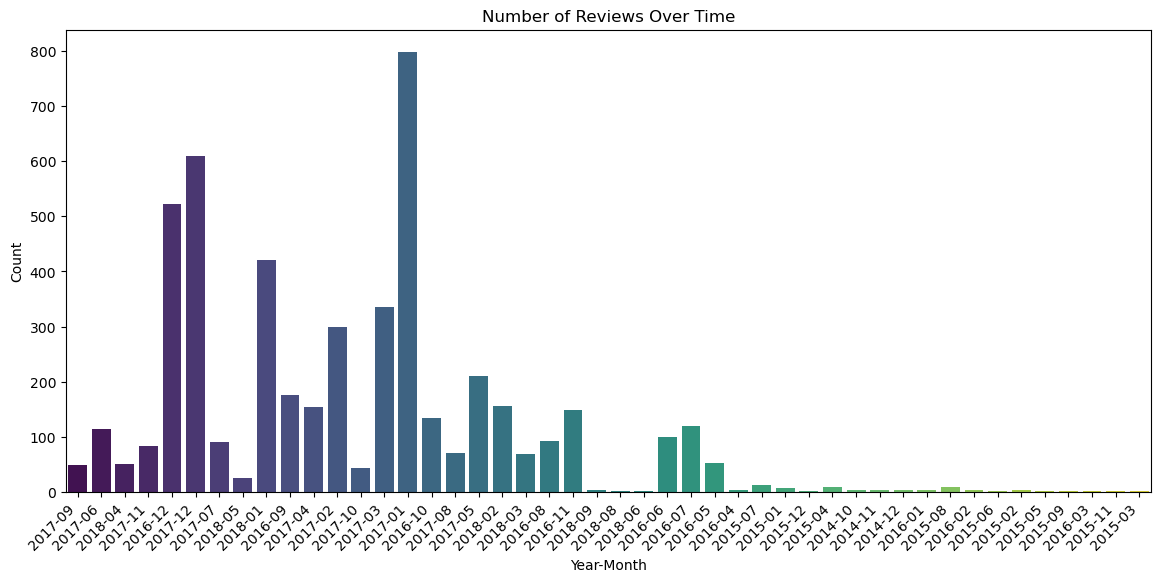

In [59]:
df['reviews.date'] = pd.to_datetime(df['reviews.date'])
df['year_month'] = df['reviews.date'].dt.to_period('M')

plt.figure(figsize=(14, 6))
sns.countplot(x='year_month', data=df, palette='viridis')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


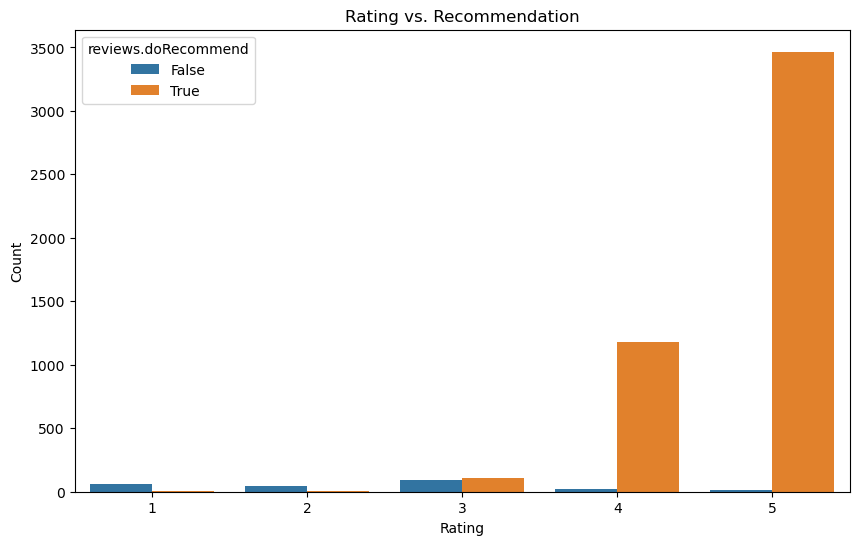

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ratings', hue='reviews.doRecommend', data=df)
plt.title('Rating vs. Recommendation')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [63]:
# Categories Distribution

C:\Users\Khushbu\AppData\Local\Temp\ipykernel_22484\1216583724.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent clipping


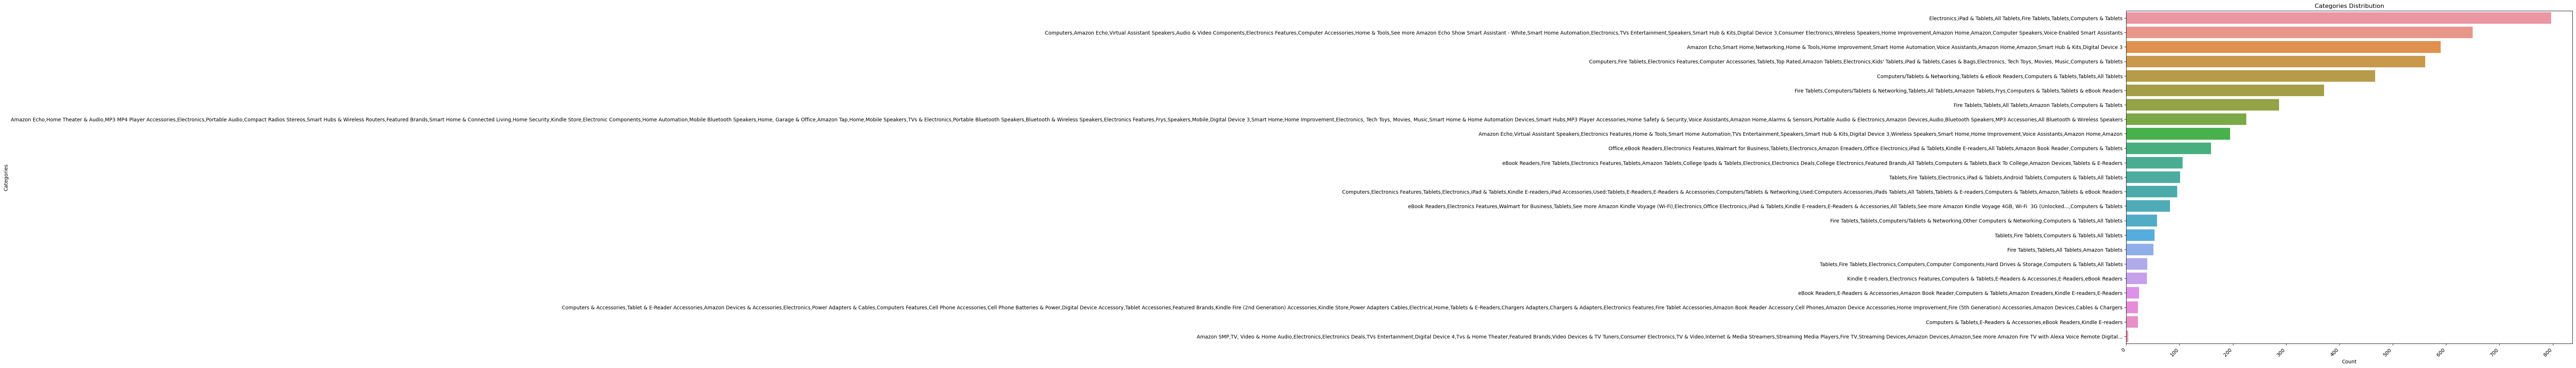

In [65]:
# count plot with rotated category labels
plt.figure(figsize=(16, 12))
sns.countplot(y='categories', data=df, order=df['categories'].value_counts().index)
plt.title('Categories Distribution')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [43]:
# Recommendation Percentage by Rating

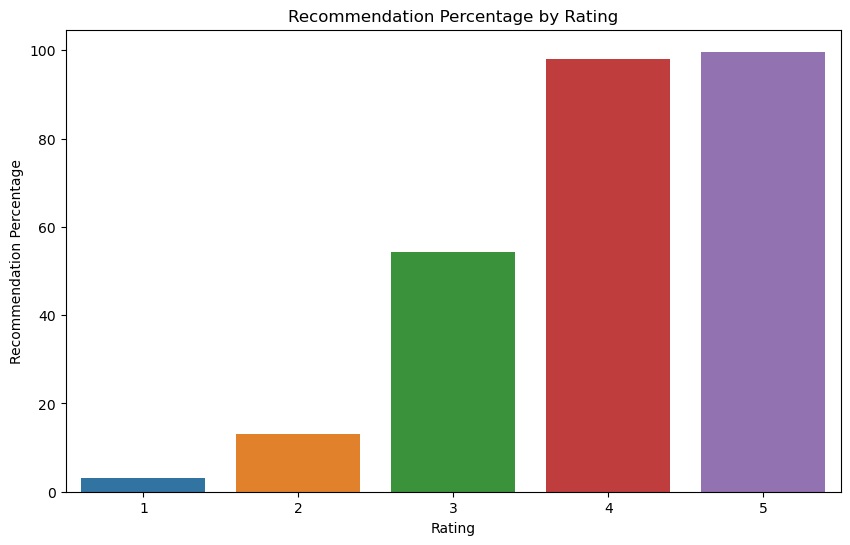

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ratings', y='reviews.doRecommend', data=df, estimator=lambda x: sum(x) / len(x) * 100, errorbar=None)
plt.title('Recommendation Percentage by Rating')
plt.xlabel('Rating')
plt.ylabel('Recommendation Percentage')
plt.show()